In [1]:
%pylab inline
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


#Ecuaciones
###crecimiento A
> Fenotipo A

$\dot{A} = \gamma (B-A) + A/g_A $

###crecimiento B
> Fenotipo B

$\dot{B} = -\gamma (B-A) + B/g_B $

##Medios
A $\longrightarrow$ $g_{A1} \gg g_{B1}$

B $\longrightarrow$ $g_{A2} \ll g_{B2}$
        


    


#Competencia Determinista
> AB contra CD en un medio oscilante

In [2]:
def growth2(A, B, media, gA, gB, gam):  
    '''Devuelve la velocidad con que crecen A y B
    A,B: cantidad de células de un tipo
    media: medio en el que se esta
    gA1, gB1: taza de crecimiento de células A y B en medio A
    gA2, gB2: taza de crecimiento de células A y B en medio B
    gam: taza de transiciones'''
    if media == 1:             #estamos en A
        vA = gam*(B-A) + A/gA[0]
        vB = -gam*(B-A) + B/gB[0]
    if media == -1:            #estamos en b
        vA = gam*(B-A) + A/gA[1]
        vB = -gam*(B-A) + B/gB[1]
        
    return vA,vB

In [3]:
def RK2(listA, listB, listvA, listvB, media, gA, gB, dt, tmax, gam):
    '''RungeKutta
    listA, listB: lista de cantidad de celulas
    listvA, listvB: lista de crecimiento 
    media: lista de medio en el que se esta
    gA, gB: taza de crecimiento gA>gB
    dt: paso
    tmax: tiempo de simulacion'''
    n=0
    while n < (tmax/dt-1):
        At = listA[n]
        Bt = listB[n]
        vAt = listvA[n]
        vBt = listvB[n]
        m = media[n]
        
        K1 = vAt*dt
        L1 = vBt*dt
        
        At = listA[n] + 0.5*K1
        Bt = listB[n] + 0.5*L1
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K2 = vAt*dt
        L2 = vBt*dt
        
        At = listA[n] + 0.5*K2
        Bt = listB[n] + 0.5*L2
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K3 = vAt*dt
        L3 = vBt*dt
        
        At = listA[n] + 0.5*K3
        Bt = listB[n] + 0.5*L3
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K4 = vAt*dt
        L4 = vBt*dt
        
        K = (K4 + 2*K3 + 2*K2 + K1)/6.0
        L = (L4 + 2*L3 + 2*L2 + L1)/6.0
        
        listA[n+1] = listA[n] + K
        listB[n+1] = listB[n] + L
        listvA[n+1], listvB[n+1]= growth2(listA[n+1], listB[n+1], m, gA, gB, gam)
        
        n = n+1

## Fast vs Slow generalistas 6h

In [4]:
tmax = 7*24*60.0                  #tiempo de simulacion
dt=1/(60.0*2)                     #paso (0.5 segundos)

A = zeros(tmax/dt)         
vA = zeros(tmax/dt) 
B = zeros(tmax/dt)
vB = zeros(tmax/dt)

C = zeros(tmax/dt)         
vC = zeros(tmax/dt) 
D = zeros(tmax/dt)
vD = zeros(tmax/dt)

T = arange(0,tmax,dt)      
Media = signal.square(pi/(6*60.0) *T)  #Oscilaciones medio

In [5]:
A[0] = 50
B[0] = 0
gA = [130.0, 1300.0]
gB = [1400.0, 140.0]
gammA = 1/(6*60.0)                 #Fast
vA[0], vB[0] = growth2(A[0], B[0], Media[0], gA, gB, gammA)

C[0] = 50
D[0] = 0
gC = [130.0, 1300.0]
gD = [1400.0, 140.0]
gammB = 1/(24*60.0)                #Slow
vC[0], vD[0] = growth2(C[0], D[0], Media[0], gC, gD, gammB)

In [6]:
RK2(A, B, vA, vB, Media, gA, gB, dt, tmax, gammA)
RK2(C, D, vC, vD, Media, gC, gD, dt, tmax, gammB)

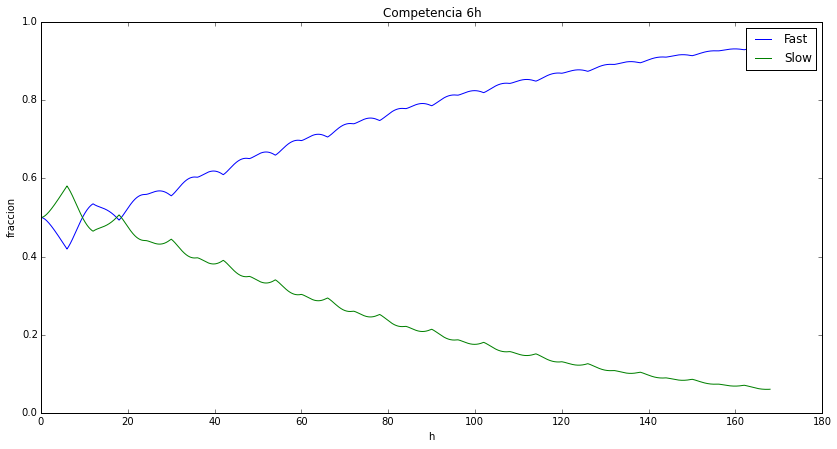

In [7]:
figsize(14,7)
plot(T/60.0,(A+B)/(A+B+C+D), label="Fast")
plot(T/60.0,(C+D)/(A+B+C+D), label="Slow")
xlabel("h")
ylabel("fraccion")
title("Competencia 6h")
legend()

## Fast vs slow generalistas 24h

In [8]:
tmax = 7*24*60.0                  #tiempo de simulacion
dt=1/(60.0*2)                     #paso (0.5 segundos)

A = zeros(tmax/dt)         
vA = zeros(tmax/dt) 
B = zeros(tmax/dt)
vB = zeros(tmax/dt)

C = zeros(tmax/dt)         
vC = zeros(tmax/dt) 
D = zeros(tmax/dt)
vD = zeros(tmax/dt)

T = arange(0,tmax,dt)      
Media = signal.square(pi/(24*60.0) *T)  #Oscilaciones medio

A[0] = 10
B[0] = 0
gA = [130.0, 1300.0]
gB = [1400.0, 140.0]
gammA = 1/(6*60.0)                 #Fast
vA[0], vB[0] = growth2(A[0], B[0], Media[0], gA, gB, gammA)

C[0] = 10
D[0] = 0
gC = [130.0, 1300.0]
gD = [1400.0, 140.0]
gammB = 1/(24*60.0)                #Slow
vC[0], vD[0] = growth2(C[0], D[0], Media[0], gC, gD, gammB)

RK2(A, B, vA, vB, Media, gA, gB, dt, tmax, gammA)
RK2(C, D, vC, vD, Media, gC, gD, dt, tmax, gammB)

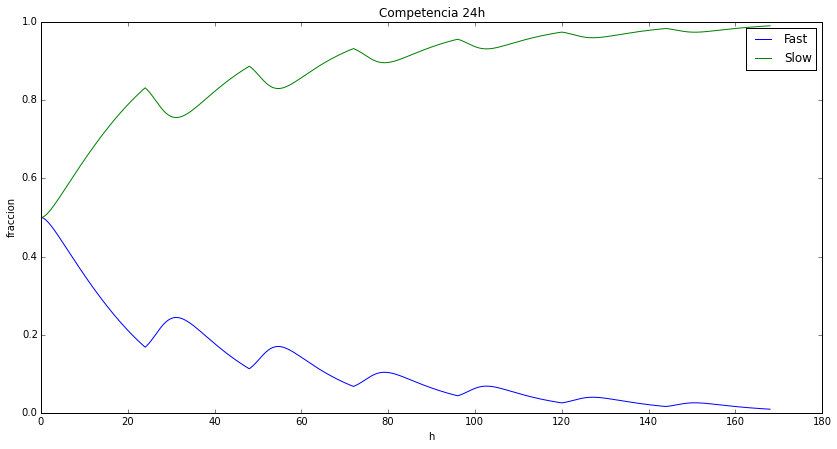

In [9]:
plot(T/60.0,(A+B)/(A+B+C+D), label="Fast")
plot(T/60.0,(C+D)/(A+B+C+D), label="Slow")
xlabel("h")
ylabel("fraccion")
title("Competencia 24h")
legend()

#Generalista vs especialista slow 24h

In [10]:
tmax = 7*24*60.0                  #tiempo de simulacion
dt=1/(60.0*2)                     #paso (0.5 segundos)

A = zeros(tmax/dt)         
vA = zeros(tmax/dt) 
B = zeros(tmax/dt)
vB = zeros(tmax/dt)

C = zeros(tmax/dt)         
vC = zeros(tmax/dt) 
D = zeros(tmax/dt)
vD = zeros(tmax/dt)

T = arange(0,tmax,dt)      
Media = signal.square(pi/(12*60.0) *T)  #Oscilaciones medio

A[0] = 10
B[0] = 0
gA = [90.0, 900.0]                #Especialista
gB = [1700.0, 170.0]
gammA = 1/(24*60.0)                 
vA[0], vB[0] = growth2(A[0], B[0], Media[0], gA, gB, gammA)

C[0] = 10
D[0] = 0
gC = [130.0, 1300.0]             #generalista
gD = [1400.0, 140.0]
gammB = 1/(24*60.0)               
vC[0], vD[0] = growth2(C[0], D[0], Media[0], gC, gD, gammB)

RK2(A, B, vA, vB, Media, gA, gB, dt, tmax, gammA)
RK2(C, D, vC, vD, Media, gC, gD, dt, tmax, gammB)

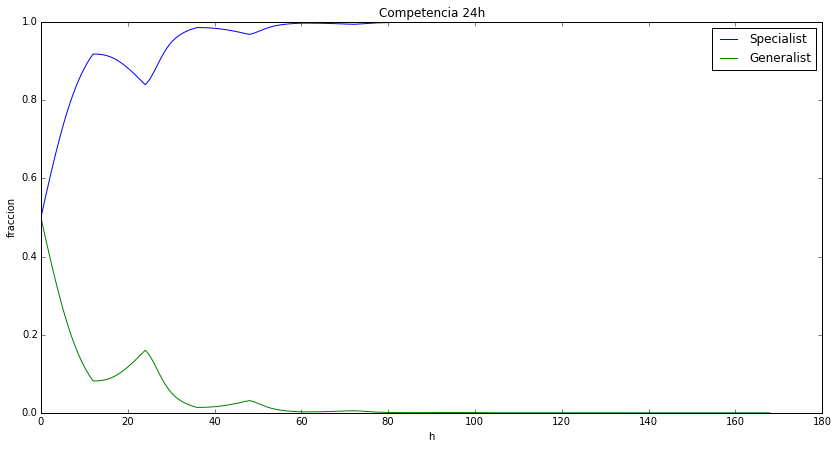

In [11]:
plot(T/60.0,(A+B)/(A+B+C+D), label="Specialist")
plot(T/60.0,(C+D)/(A+B+C+D), label="Generalist")
xlabel("h")
ylabel("fraccion")
title("Competencia 24h")
legend()

# Transiciones
> A se vuelve B a una taza $\gamma$, en medio oscilante

In [12]:
def growth3(A, B, gAl, gBl, gam, Media, Tl, tactual):
        '''Simulación con algoritmo de gillespie'''
        ind = where(Tl==round(tactual,3))
        med = Media[ind]
        gA=0.0
        gB=0.0
        #Check en qué medio estamos
        if med == 1:                                      #Estamos en A
            gA = gAl[0]
            gB = gBl[0]
        else:                                             #Estamos en B
            gA = gAl[1]
            gB = gBl[1]
            
        K = 2*gam*A + 2*gam*B + A/gA + B/gB 
        u = random.random(3)
        talgo = 1/K * log(1/u[0])                                      
        if u[1] < (2*gam*A)/K:                            #A pasa a B
            A = A-1
            B = B+1
        elif u[1] < (2*gam*A + 2*gam*B)/K:                #B pasa a A
            A = A+1
            B = B-1
        elif u[1] < (2*gam*A + 2*gam*B + A/gA)/K:         #A crece
            A = A+1
            if u[2] < 0.5:                                #Moran
                if A!=0:
                    A=A-1
            else:
                if B!=0:
                    B=B-1
        else:                                             #B crece
            B = B+1
            if u[2] < 0.5:                                #Moran
                if A!=0:
                    A=A-1
            else:
                if B!=0:
                    B=B-1
        return A, B, talgo

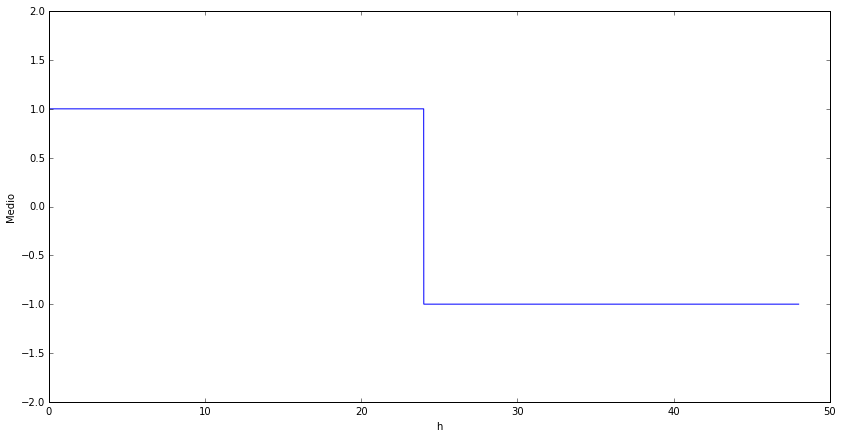

In [14]:
B = array([500.0])   #Numero de células B
A = array([500.0])   #Numero de células A

gA = [130.0, 1300.0]
gB = [1400.0, 140.0]
gam = 1/(6*60.0)

tmax = 48*60.0                  #tiempo de simulacion
T = array([0])

Tm = arange(0,tmax,0.001)      
Media = signal.square(pi/(24*60.0) *Tm)

plot(Tm/60.0,Media)
ylim(-2,2)
xlabel("h")
ylabel("Medio")

In [15]:
t=0.0
i=0
while (t<tmax):
    An, Bn, dt = growth3(A[i], B[i], gA, gB, gam, Media, Tm, t)
    A = append(A,An)
    B = append(B,Bn)
    
    T = append(T,t+dt)
    i = i+1
    t = t+dt
  
    

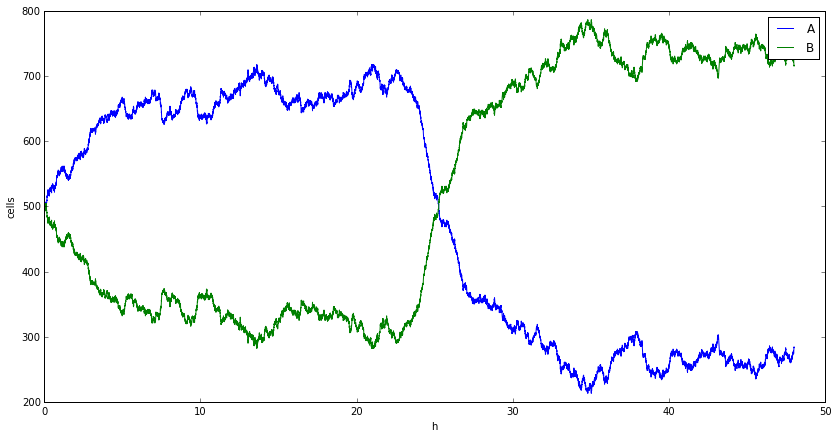

In [17]:
plot(T/60.0,A, label="A")
plot(T/60.0,B, label="B")
xlabel("h")
ylabel("cells")
legend()

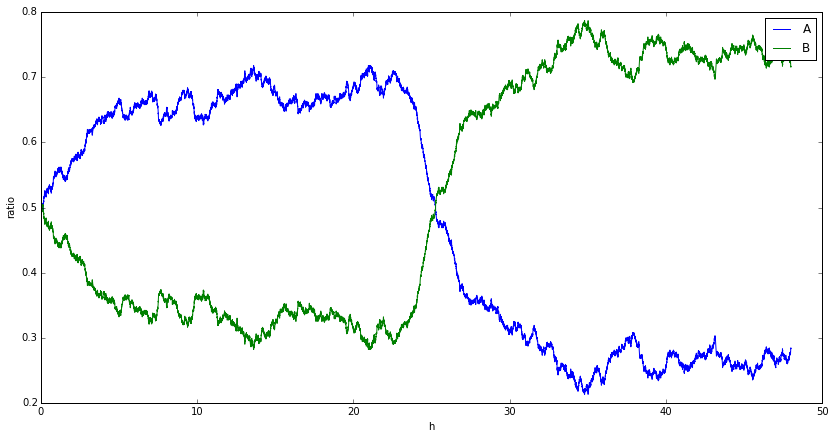

In [18]:
plot(T/60.0,A/(A+B), label="A")
plot(T/60.0,B/(A+B), label="B")
xlabel("h")
ylabel("ratio")
legend()

#Competencia

In [19]:
def growth4(A, B, C, D, gAl, gBl, gCl, gDl, gamAB, gamCD, Media, Tl, tactual):
        '''Simulación con algoritmo de gillespie'''
        ind = where(Tl==round(tactual,3))
        med = Media[ind]
        gA=0.0
        gB=0.0
        #Check en qué medio estamos
        if med == 1:                                      #Estamos en A
            gA = gAl[0]
            gB = gBl[0]
            gC = gCl[0]
            gD = gDl[0]
        else:                                             #Estamos en B
            gA = gAl[1]
            gB = gBl[1]
            gC = gCl[1]
            gD = gDl[1]
            
        K = 2*gamAB*A + 2*gamAB*B + 2*gamCD*C + 2*gamCD*D + A/gA + B/gB + C/gC + D/gD
        u = random.random(2)
        talgo = 1/K * log(1/u[0])                                      
        if u[1] < (2*gamAB*A)/K:                                                  #A pasa a B
            A = A-1
            B = B+1
            C = C
            D = D
        elif u[1] < (2*gamAB*A+2*gamAB*B)/K:                                      #B pasa a A
            A = A+1
            B = B-1
            C = C
            D = D
        elif u[1] < (2*gamAB*A+2*gamAB*B+2*gamCD*C)/K:                            #C pasa a D
            A = A
            B = B
            C = C-1
            D = D+1
        elif u[1] < (2*gamAB*A+2*gamAB*B+2*gamCD*C+2*gamCD*D)/K:                  #B pasa a A
            A = A
            B = B
            C = C+1
            D = D-1
        elif u[1] < (2*gamAB*A+2*gamAB*B+2*gamCD*C+2*gamCD*D+A/gA)/K:             #A crece
            A = A+1
            A,B,C,D = checkmoran(A,B,C,D)
            if A+B+C+D!=10000:
                A = A-1
        elif u[1] < (2*gamAB*A+2*gamAB*B+2*gamCD*C+2*gamCD*D+A/gA+B/gB)/K:        #B crece                                     #B crece
            B = B+1
            A,B,C,D = checkmoran(A,B,C,D)
            if A+B+C+D!=10000:
                B = B-1
        elif u[1] < (2*gamAB*A+2*gamAB*B+2*gamCD*C+2*gamCD*D+A/gA+B/gB+C/gC)/K:   #C crece
            C = C+1
            A,B,C,D = checkmoran(A,B,C,D)
            if A+B+C+D!=10000:
                C = C-1
        else:                                                                     #D crece
            D = D+1
            A,B,C,D = checkmoran(A,B,C,D)
            if A+B+C+D!=10000:
                D = D-1
    
        return A, B, C, D, talgo

In [20]:
def checkmoran(A,B,C,D):
    u = random.random(1)
    if u < 0.25 and A>0:                                
        A=A-1
    elif u < 0.5 and B>0:
        B=B-1
    elif u < 0.75 and C>0:
        C=C-1
    elif u < 1.00 and D>0:
        D=D-1
           
    return A,B,C,D

#Fast vs Slow 6h

(-2, 2)

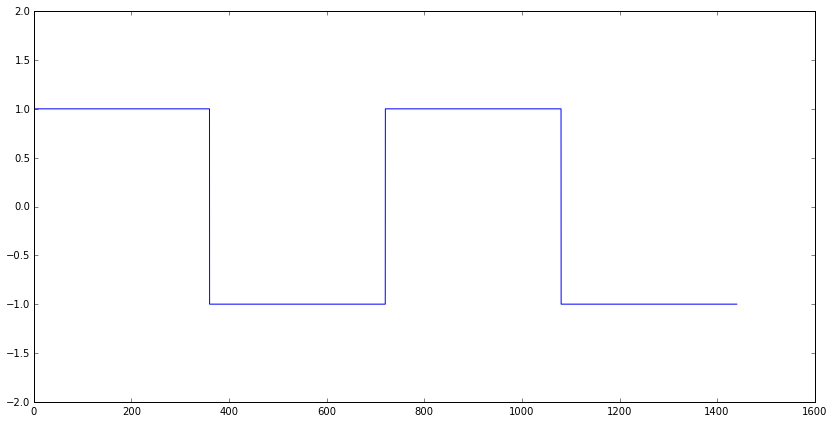

In [21]:
A = array([2500.0])             #Numero de células A
B = array([2500.0])             #Numero de células B

C = array([2500.0])             #Numero de células C
D = array([2500.0])             #Numero de células D

gA = [130.0, 1300.0]           #Crecimiento A
gB = [1400.0, 140.0]           #Crecimiento B 
gC = [130.0, 1300.0]           #Crecimiento C
gD = [1400.0, 140.0]           #Crecimiento D
gamAB = 1/(6*60.0)             #Transición A-B
gamCD = 1/(24*60.0)            #Transición C-D

tmax = 24*60.0                 #tiempo de simulacion
T = array([0])               #Lista tiempo

Tm = arange(0,tmax,0.001)      
Media = signal.square(pi/(6*60.0) *Tm) #Variación en medio
plot(Tm,Media)
ylim(-2,2)

In [22]:
t=0.0
i=0
An = 2500
Bn = 2500
Cn = 2500
Dn = 2500
while (t<tmax and (An+Bn)!=0 and (Cn+Dn)!=0):
    An, Bn, Cn, Dn, dt = growth4(A[i], B[i], C[i], D[i], gA, gB, gC, gD, gamAB, gamCD, Media, Tm, t)
    A = append(A,An)
    B = append(B,Bn)
    C = append(C,Cn)
    D = append(D,Dn)
    
    T = append(T,t+dt)
    i = i+1
    t = t+dt


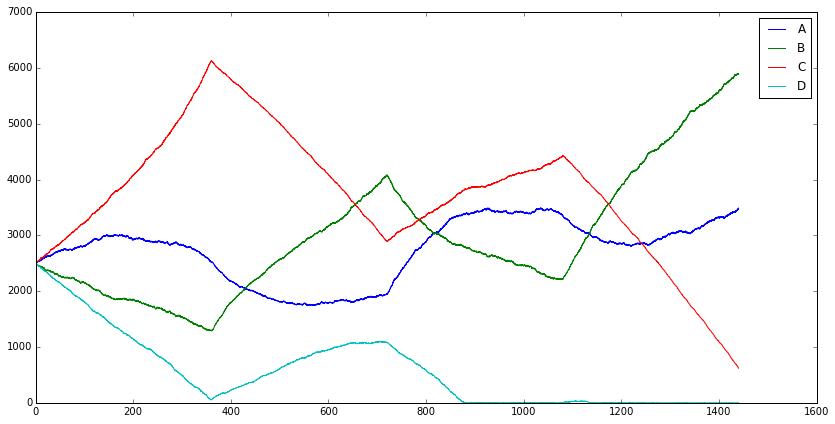

In [23]:
plot(T, A, label="A")
plot(T, B, label="B")
plot(T, C, label="C")
plot(T, D, label="D")
legend()

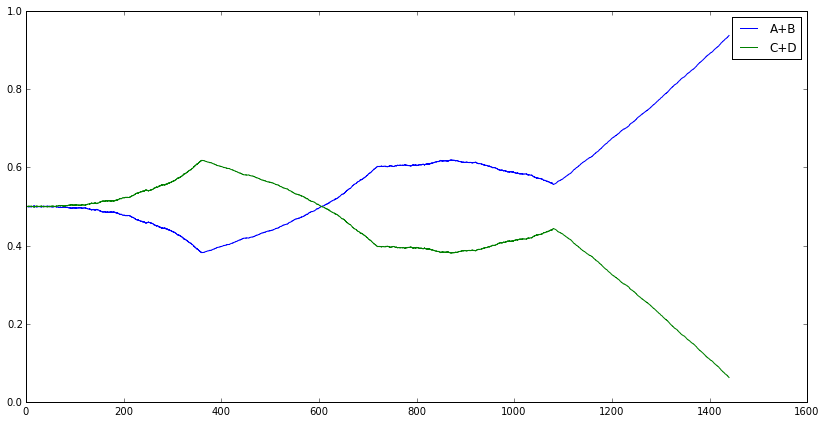

In [24]:
plot(T,(A+B)/(A+B+C+D), label="A+B")
plot(T,(C+D)/(A+B+C+D), label="C+D")
legend()

#Fast vs Slow 24h

In [25]:
A = array([2500.0])             #Numero de células A
B = array([2500.0])             #Numero de células B

C = array([2500.0])             #Numero de células C
D = array([2500.0])             #Numero de células D

gA = [130.0, 1300.0]           #Crecimiento A
gB = [1400.0, 140.0]           #Crecimiento B 
gC = [130.0, 1300.0]           #Crecimiento C
gD = [1400.0, 140.0]           #Crecimiento D
gamAB = 1/(6*60.0)             #Transición A-B
gamCD = 1/(24*60.0)            #Transición C-D

tmax = 60*60.0                 #tiempo de simulacion
T = array([0])               #Lista tiempo

Tm = arange(0,tmax,0.001)      
Media = signal.square(pi/(24*60.0) *Tm) #Variación en medio

In [26]:
t=0.0
i=0
An = 2500
Bn = 2500
Cn = 2500
Dn = 2500
while (t<tmax and (An+Bn)!=0 and (Cn+Dn)!=0):
    An, Bn, Cn, Dn, dt = growth4(A[i], B[i], C[i], D[i], gA, gB, gC, gD, gamAB, gamCD, Media, Tm, t)
    A = append(A,An)
    B = append(B,Bn)
    C = append(C,Cn)
    D = append(D,Dn)
    
    T = append(T,t+dt)
    i = i+1
    t = t+dt


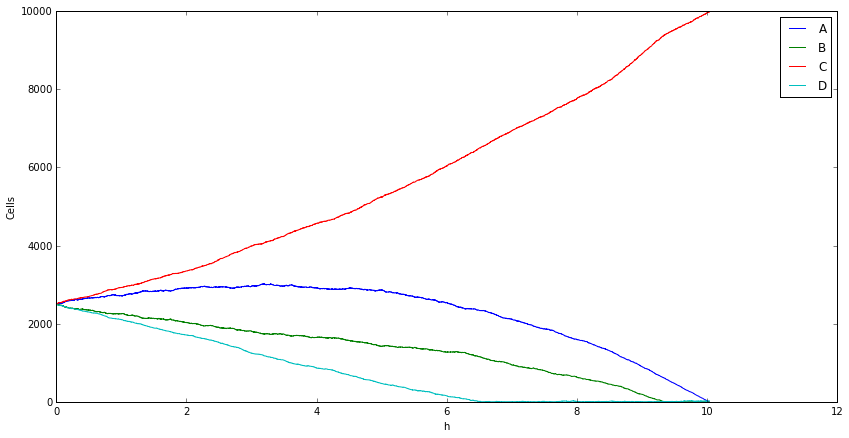

In [27]:
plot(T/60.0, A, label="A")
plot(T/60.0, B, label="B")
plot(T/60.0, C, label="C")
plot(T/60.0, D, label="D")
xlabel("h")
ylabel("Cells")
legend()

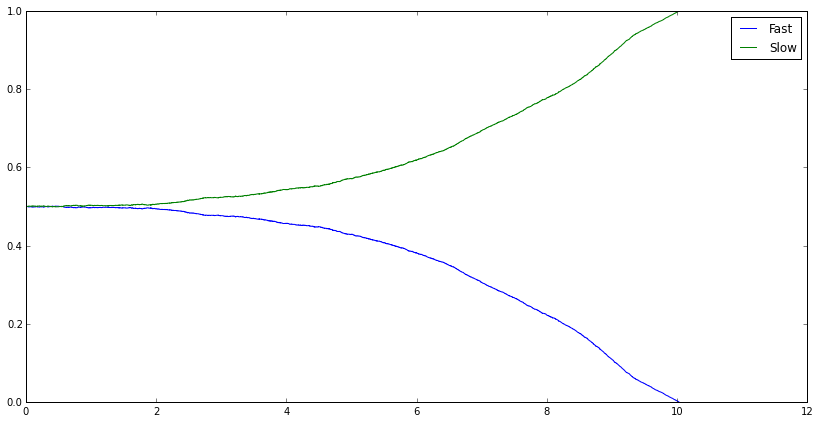

In [28]:
plot(T/60.0,(A+B)/(A+B+C+D), label="Fast")
plot(T/60.0,(C+D)/(A+B+C+D), label="Slow")
legend()